# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [1]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
print(a[-3:])

# reverse the list
print(a[::-1])

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
print([num ** 2 for num in a])

[4, 5, 6]
[6, 5, 4, 3, 2, 1]
[1, 4, 9, 16, 25, 36]


In [5]:
# create a numpy array from this list
import numpy as np
b = np.array(a)
print(b)

[1 2 3 4 5 6]


In [3]:
# find the mean of b
print(b.mean())

3.5


In [4]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
print(b ** 2)

[ 1  4  9 16 25 36]


In [7]:
# change b from a length-6 list to a 2x3 matrix
b = b.reshape((2, 3))
print(b)

[[1 2 3]
 [4 5 6]]


In [10]:
# find the mean value of each row
print(b.mean(axis=1))

[2. 5.]


In [11]:
# find the mean value of each column
print(b.mean(axis=0))

[2.5 3.5 4.5]


In [16]:
# find the third column of b
print(b[:,2])

[3 6]


In [17]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv('../data/starbucks_clean.csv')

In [19]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
print(df["calories"].mean())

196.2478260869565


In [22]:
# how many different categories of beverages are there?
print(len(pd.unique(df["beveragecategory"])))

9


In [25]:
# what is the average # calories for each beverage category?
beverage_categories = df.groupby("beveragecategory")
beverage_categories["calories"].mean()

beveragecategory
Classic Espresso Drinks              140.172414
Coffee                                 4.250000
Frappuccino® Blended Coffee          276.944444
Frappuccino® Blended Crème           233.076923
Frappuccino® Light Blended Coffee    162.500000
Shaken Iced Beverages                114.444444
Signature Espresso Drinks            250.000000
Smoothies                            282.222222
Tazo® Tea Drinks                     186.000000
Name: calories, dtype: float64

In [36]:
# what beverage preparation includes the most sugar on average?
df.head()
beverage_prep = df.groupby("beverage_prep")
beverage_prep["sugars"].mean().idxmax()

'Whole Milk'

In [38]:
# what is the average % daily value calcium content for each beverage?
bevs = df.groupby("beverage")
bevs["calcium"].mean()

beverage
Banana Chocolate Smoothie                              20.000000
Brewed Coffee                                           0.500000
Caffè Americano                                         1.500000
Caffè Latte                                            35.000000
Caffè Mocha (Without Whipped Cream)                    30.000000
Cappuccino                                             22.500000
Caramel                                                11.000000
Caramel (Without Whipped Cream)                        12.000000
Caramel Apple Spice (Without Whipped Cream)             0.000000
Caramel Macchiato                                      28.333333
Coffee                                                 12.333333
Espresso                                                0.000000
Hot Chocolate (Without Whipped Cream)                  35.000000
Iced Brewed Coffee (With Classic Syrup)                 0.000000
Iced Brewed Coffee (With Milk & Classic Syrup)          8.000000
Java Chip       

In [66]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
optimized = bevs[["calories", "protein"]].agg({"calories": "min", "protein": "max"})
optimized["diff"] = optimized["protein"] - optimized["calories"]
optimized.loc[optimized["diff"].idxmax()]

calories    0.0
protein     0.0
diff        0.0
Name: Tazo® Tea, dtype: float64

<AxesSubplot:xlabel='beverage,calories'>

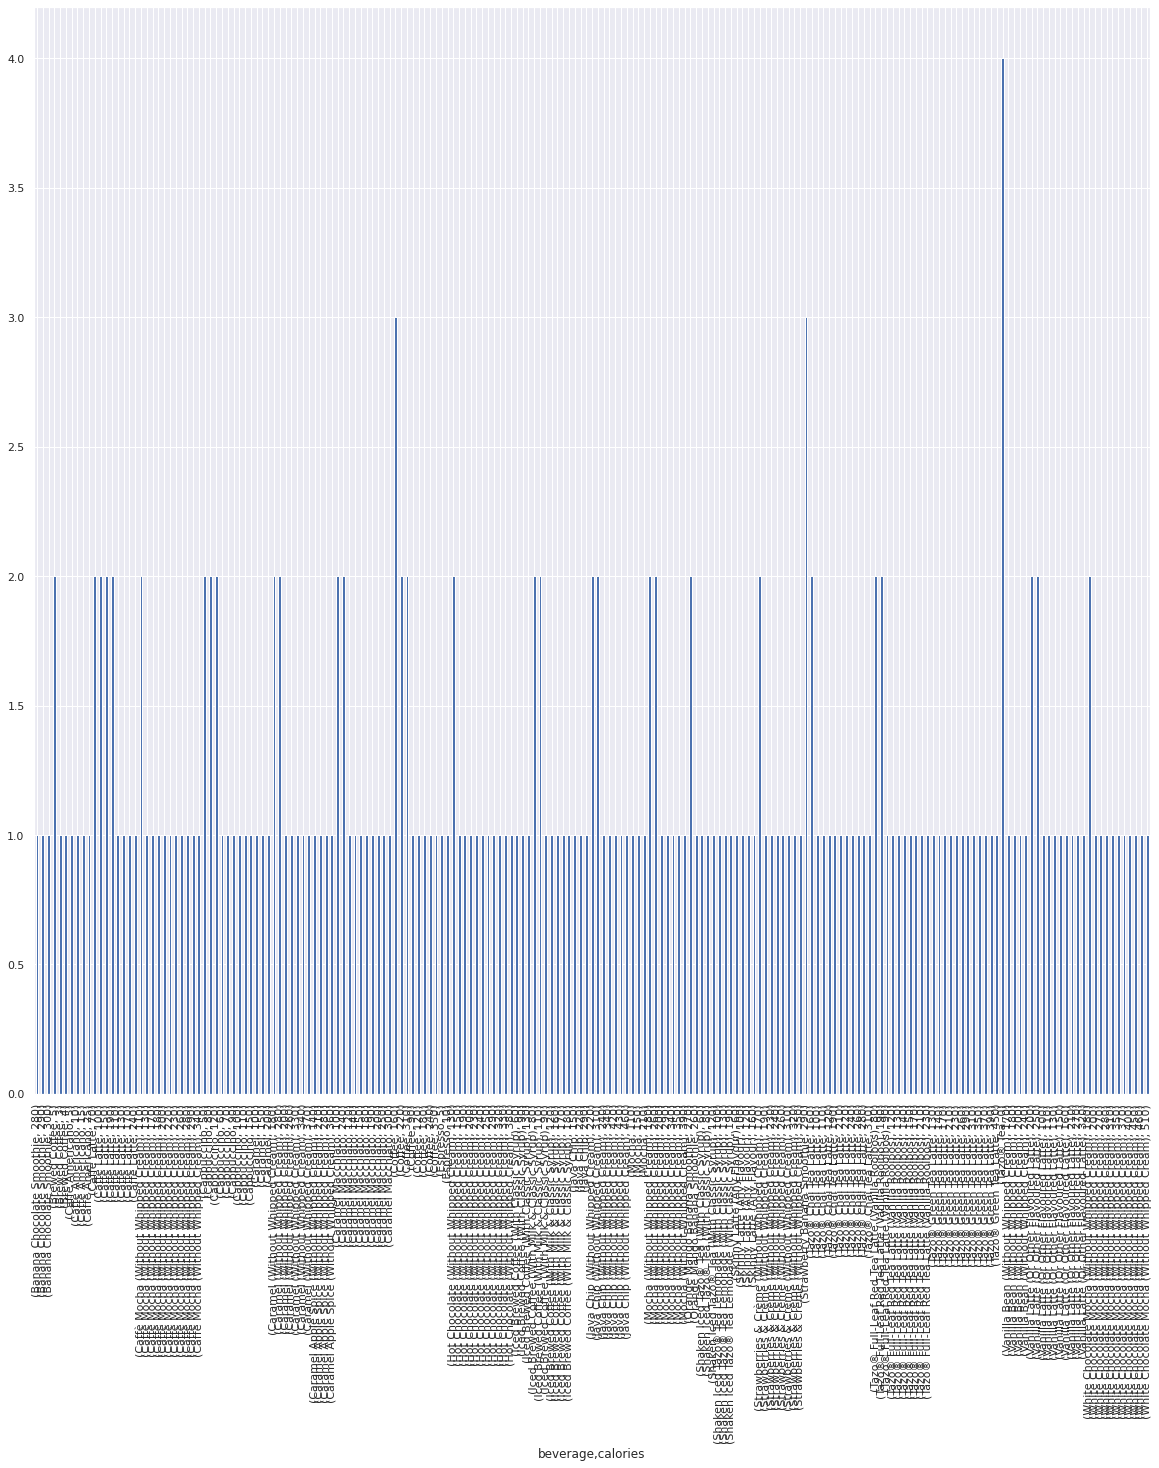

In [102]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt

bevs["calories"].value_counts().plot.bar(figsize=(20, 20))


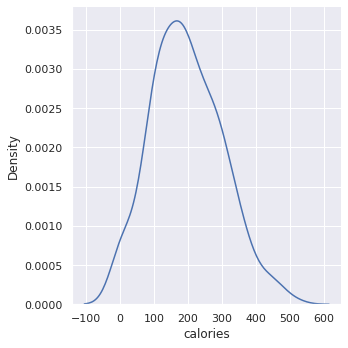

In [99]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.set()
sns.displot(data=df, x="calories", kind="kde")

<AxesSubplot:xlabel='calories', ylabel='total fat'>

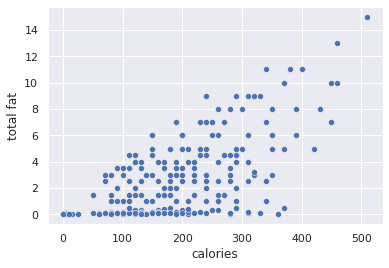

In [85]:
# plot calories against total fat using seaborn
bevs.head()
sns.scatterplot(data=df, x="calories", y="total fat")

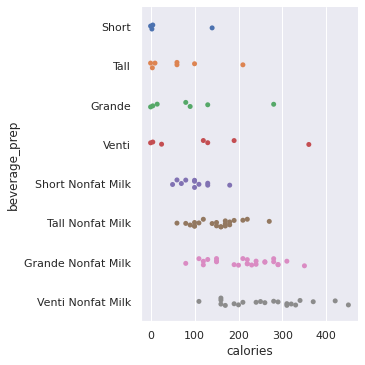

In [96]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
categories = ["Short", "Tall", "Grande", "Venti", "Short Nonfat Milk", "Tall Nonfat Milk", "Grande Nonfat Milk", "Venti Nonfat Milk"]
sns.catplot(data=df, x='calories', y='beverage_prep', order=categories)